# Sample CNN Jupyter Notebook Code
This Jupyter Notebook will have a focus on Convolution Neural Networks and how to best implement them using Python. This Jupyter Notebook serves as a guide with regards to performing object detection using different convolutional layers.

### Introduction to Keras
Keras is a simple to use Deep Learning library tool in Python. Here, we'll build a simple Convolution Netural Network and train it to solve a real problem with Keras. To do this, we start off with a Computer Vision problem. We use the MNIST handwritten digit classification from the MNIST database. We use a image, and then classify it as a digit.

## Importing Libraries
Using a python installation, we download the packages `numpy`, `keras`, `mnist`, `matplotlib` and `tensorflow`.

In [14]:
# importing all necessary libraries
import numpy as np
import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

# importing keras
from tensorflow import keras

# keras imports
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input

Next up, we write the following lines of code that load up the training images and labels from the MNIST database, which is a very popular dataset of handwritten digits, which is often used to train and test image classification models.

In [15]:
# download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

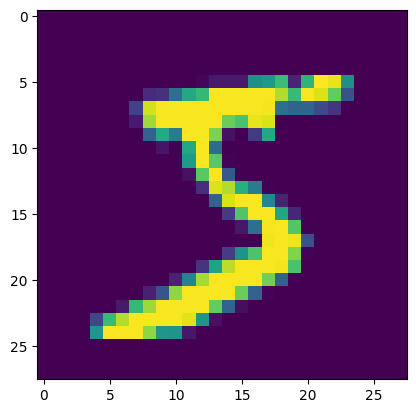

In [16]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [17]:
#check image shape
X_train[0].shape

(28, 28)

## Data Pre-Processing
Next, we need to reshape our dataset inputs (`X_train` and `X_test`) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for `X_train` and `10,000` for `X_test`). Next, comes the shape of each image (28 x 28). Last number is 1, which signifies that the images are greyscale. 

In [18]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### One-Hot Encoding
Next up, we one-hot encode the target variable. This means a column is created for each output category and a binary variable is inputted for each category. 

In [19]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Building the Model
Next up, we create a sequential model in Keras, which means that the layers will be added one after another, like a chain. Then, we add our first convolution layer by doing `model.add()` Here are the following details:

`model.add(Input(shape=(28, 28, 1)))`: adds an input layer which tells the neural network to expect input data with the shape of `(28, 28, 1)`, which matches the shape of the MNIST dataset images. Each image is `28 x 28` and is grayscaled with `1`


`model.add(Conv2D(64, kernel_size=3, activation='relu'))`
- `64` means 64 filters used to process the image. Each filter will look for different patterns in the image (like edges)
- `kernel_size=3` the filter will be a 3x3 square, which means it will look a 3x3 area of the image at a time
- `activation=relu` this is the activatoin function (ReLU) which helps the model decide which features are important
- `input_shape=(28, 28, 1)` this specifies the shape of the input images. Each image is `28 x 28` and is grayscaled with `1`


`model.add(Flatten())`: the flatten layer converts the multi-dimensional data into a 1D vector. 
`model.add(Dense(10, activation='softmax'))`: the `Dense` layer is a fully connected layer, which means each neuron in this layer is connected to every neuron in the previous layer. The layer uses `10` neurons, and the `softmax` activation function is used to convert the raw output scores into probabilities

In [20]:
# create model
model = Sequential()

# Add Input layer 
model.add(Input(shape=(28, 28, 1)))

# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## Compiling the Model
We now compile the mode. In order to compile the model, we take three parameters: optimizer, loss and metrics. For this, `optimizer` controls the learning rate, `learning rate` determines how fast the optimal weights for the model are calculated. Lastly, we use the `accuracy` metric to see the accuracy score on the validation set when we train the model. 

In [21]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model
Now, we train the model. We use `fit()` function on our model with the parameters of training data `X-train`, target data `y_train`, validation data and the number of epochs.

In [22]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9135 - loss: 1.2944 - val_accuracy: 0.9666 - val_loss: 0.1005
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9806 - loss: 0.0635 - val_accuracy: 0.9769 - val_loss: 0.0838
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0449 - val_accuracy: 0.9716 - val_loss: 0.1150


## Making Predictions
Lastly, we use the predict function. The predict function gives an array of 10 numbers. These numbers are probabilities that the input image represents each digit (0-9). The array index with the higest number represents the model prediction. 

In [23]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


array([[2.3648321e-12, 1.6704969e-16, 1.1043984e-09, 8.3387391e-07,
        2.6184282e-13, 2.8306100e-15, 3.3664558e-19, 9.9999917e-01,
        2.7169477e-11, 7.9108676e-13],
       [1.0098424e-09, 9.8509245e-09, 9.9999893e-01, 8.7809161e-07,
        2.3264281e-12, 4.0128681e-15, 2.0312884e-08, 3.1991392e-17,
        1.8529863e-07, 3.6764495e-15],
       [1.8219300e-05, 9.6926427e-01, 2.2677109e-02, 1.3791361e-06,
        4.8433756e-03, 2.6692183e-05, 3.1869371e-05, 1.4731007e-06,
        3.1350343e-03, 3.3917621e-07],
       [9.9999738e-01, 4.9987975e-14, 2.3928455e-06, 9.1744327e-11,
        1.5122483e-09, 9.0753893e-10, 1.9954038e-08, 6.4060901e-12,
        3.3080621e-08, 2.4790833e-07]], dtype=float32)

In [24]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

When comparing the predictions with the actual images, we can see that the model predicted correctly.